# Q1

In [3]:
#Generate random matrix
X = 4 + randn(50,2)

50×2 Array{Float64,2}:
 5.8296   1.64292
 4.95701  3.65764
 5.76867  4.31585
 3.64598  4.20429
 3.68406  2.69729
 4.84996  4.40859
 4.05158  4.08015
 4.98992  4.21203
 4.34501  4.73541
 4.72348  3.92193
 3.77694  3.18372
 3.74107  2.4559 
 4.22863  3.91556
 ⋮               
 5.41411  3.70214
 4.05269  4.67273
 3.74221  4.8911 
 3.6516   4.34578
 4.5049   4.77525
 5.06263  4.26175
 3.32475  4.65989
 3.05881  6.48064
 4.754    3.27586
 1.14641  4.26447
 2.17997  4.46193
 4.30335  3.06859

I model this optimization problem by solving for two variables. **r_squared** which is the squared radius of the circle and **center**, which is the center position of the circle. I then make the constraint that every point in X must have a distance squared from the center less than or equal to **r_squared**. I then make my objective to minimize **r_squared**. Since **center** is a free variable and I minimize **r_squared**, then I minimize the area of the circle defined by **r_squared** as much as possible while still containing all the points. Also note that I use the square of the radius as a variable, since if I used the radius as a variable then the problem has a Q matrix that is not Positive Semi Definite.

In [10]:
using JuMP, Gurobi

m  = Model()
@variable(m, r_square >= 0)
@variable(m , center[1:2])
for i in  1:50
    @constraint(m , r_square >= sum((center - X[i,:]).^2))
end
@objective(m, Min, r_square)
solve(m)

Optimize a model with 0 rows, 3 columns and 0 nonzeros
Model has 50 quadratic constraints
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 198 rows, 201 columns, 496 nonzeros
Presolved model has 50 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 4
 AA' NZ     : 6.920e+02
 Factor NZ  : 1.295e+03
 Factor Ops : 8.617e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.23489570e+02  0.00000000e+00  2.64e+01 1.05e-01  1.07e+00     0s
   1   1.93997751e+01  1.16871692e+00  3.11e+00 4.17e-03  1.21e-01     0s
   2   3.33767723e+00  1.21090681e+00  5.67e-01 2.82e-03  2.57e-02     0s
   3   3.01939699e+00  1.04352691e+00  5.06e-01 5.48e-04  1.74e-0

:Optimal

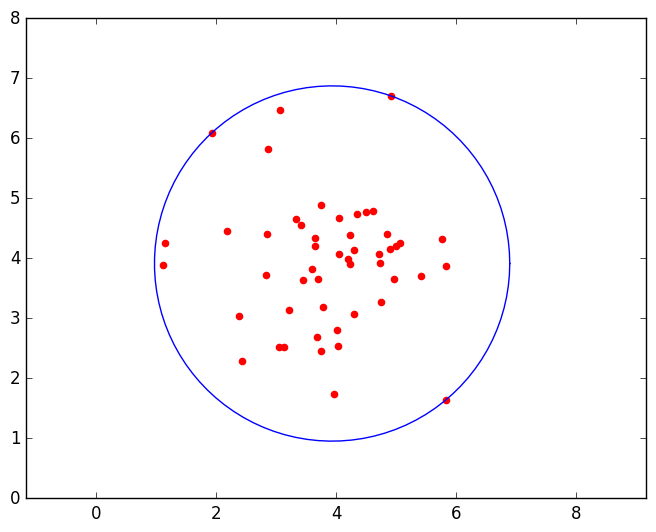

(0.0,8.0,0.0,8.0)

In [11]:
using PyPlot
t = linspace(0,2pi,100)
r_val = sqrt(getvalue(r_square))
center_val = getvalue(center)
plot(center_val[1] + r_val*cos(t), center_val[2] + r_val*sin(t))
scatter(X[:,1], X[:,2], color="red")
axis("equal")

# Q2
## a.

The problem is not convex the constraint is not positive semidefinite. For example if we set ** x = -y = 1 , z = 0**  then the left hand side becomes -4.  

## b.
This QCQP is unbounded. This is true since for any **x,y,z** such that **x = -y, z = 0**, the LHS of the constraint will always be less than or equal to 0. Therefore it will be feasible. Then cleary the problem is unbounded since I can let **x** and **y** go to positive and negative infinity respectively which will in turn let the objective go to infinity.

# Q3
## a.

In [49]:
m = Model()
#create variables
@variable(m, XA[1:60,1:2])
@variable(m, XB[1:60,1:2])
@variable(m, VA[1:60,1:2])
@variable(m, VB[1:60,1:2])
@variable(m, UA[1:60,1:2])
@variable(m, UB[1:60,1:2])

#start times
@constraint(m, XA[1,:] .== [0,0])
@constraint(m, XB[1,:] .== [0.5,0])

#start velocities
@constraint(m, VA[1,:] .==[0,20])
@constraint(m, VB[1,:] .== [30, 0])

#rendezvous constraint
@constraint(m, XA[60,:] .== XB[60,:])

#dynamics constraints
for i in 2:60
    @constraint(m, XA[i,:] .== XA[i-1,:] + VA[i-1,:]/3600.)
    @constraint(m, XB[i,:] .== XB[i-1,:] + VB[i-1,:]/3600.)
    @constraint(m, VA[i,:] .== VA[i-1, :] + UA[i-1,:])
    @constraint(m, VB[i,:] .== VB[i-1,:] + UB[i-1,:])
end

@objective(m, Min, sum(UA.^2) + sum(UB.^2))

solve(m)

Optimize a model with 482 rows, 720 columns and 1428 nonzeros
Model has 240 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-01, 3e+01]
Presolve removed 480 rows and 488 columns
Presolve time: 0.00s
Presolved: 2 rows, 232 columns, 232 nonzeros
Presolved model has 232 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 232
 AA' NZ     : 0.000e+00
 Factor NZ  : 2.000e+00
 Factor Ops : 2.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.05930705e+02 -1.05930705e+02  1.42e-14 1.55e+00  0.00e+00     0s
   1   1.05930705e+02  1.05930493e+02  2.13e-14 1.55e-06  0.00e+00     0s
   2   1.05930705e+02  1.05930705e+02  7.11e-15 1.55e-12  0.00e+00     0s

Barrier solve

:Optimal

Below is the trajectories of both hovercrafts. Alice is blue and Bob is red

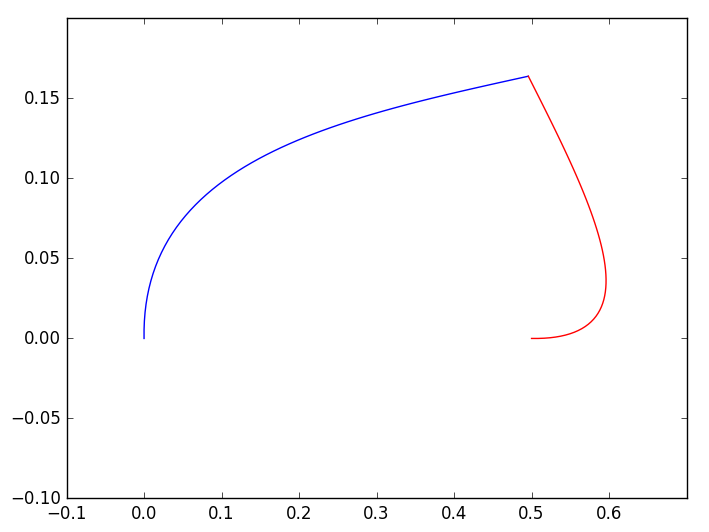

optimal rendezvous location[0.495833,0.163889]

In [50]:
va_a = getvalue(VA)
xa = getvalue(XA)
xb = getvalue(XB)
plot(xa[:,1], xa[:,2], color="blue")
plot(xb[:,1], xb[:,2], color="red")
xlim(-0.1,0.7)
ylim(-0.1,0.2)
print("optimal rendezvous location", xa[60,:])

## b.

In [51]:
m = Model()
#create variables
@variable(m, XA[1:60,1:2])
@variable(m, XB[1:60,1:2])
@variable(m, VA[1:60,1:2])
@variable(m, VB[1:60,1:2])
@variable(m, UA[1:60,1:2])
@variable(m, UB[1:60,1:2])

#start times
@constraint(m, XA[1,:] .== [0,0])
@constraint(m, XB[1,:] .== [0.5,0])

#start velocities
@constraint(m, VA[1,:] .==[0,20])
@constraint(m, VB[1,:] .== [30, 0])

#rendezvous constraint
@constraint(m, XA[60,:] .== XB[60,:])

#rendezvous velocity constraint
@constraint(m, VA[60,:] .== VB[60,:])

#dynamics constraints
for i in 2:60
    @constraint(m, XA[i,:] .== XA[i-1,:] + VA[i-1,:]/3600.)
    @constraint(m, XB[i,:] .== XB[i-1,:] + VB[i-1,:]/3600.)
    @constraint(m, VA[i,:] .== VA[i-1, :] + UA[i-1,:])
    @constraint(m, VB[i,:] .== VB[i-1,:] + UB[i-1,:])
end

@objective(m, Min, sum(UA.^2) + sum(UB.^2))

solve(m)

Optimize a model with 484 rows, 720 columns and 1432 nonzeros
Model has 240 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-01, 3e+01]
Presolve removed 480 rows and 484 columns
Presolve time: 0.00s
Presolved: 4 rows, 236 columns, 468 nonzeros
Presolved model has 236 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 236
 AA' NZ     : 2.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.000e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.34570427e+02 -2.34570427e+02  1.10e-12 2.54e+00  0.00e+00     0s
   1   2.34570427e+02  2.34569958e+02  3.55e-14 2.54e-06  0.00e+00     0s
   2   2.34570427e+02  2.34570427e+02  3.55e-14 2.54e-12  0.00e+00     0s

Barrier solve

:Optimal

Below is the trajectories of both hovercrafts. Alice is blue and Bob is red

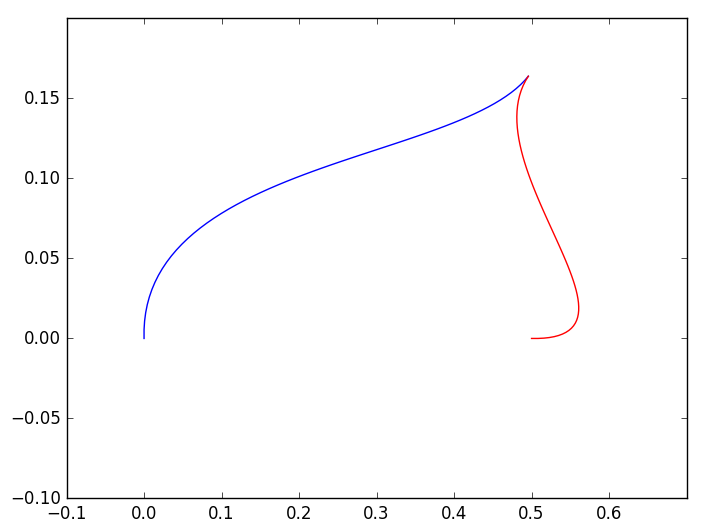

optimal rendezvous location[0.495833,0.163889]

In [52]:
va_b = getvalue(VA)
xa = getvalue(XA)
xb = getvalue(XB)
plot(xa[:,1], xa[:,2], color="blue")
plot(xb[:,1], xb[:,2], color="red")
xlim(-0.1,0.7)
ylim(-0.1,0.2)
print("optimal rendezvous location", xa[60,:])

As you can see the rendezvous location is the same with and without the velocity constraint.

## c.

As you can see below. In both optimizations for part a and b, Alice exceeds 35 mph, with a max speed of approximately 42.7 mph.

In [53]:
va_b = getvalue(VA)
max = -1
for i in 1:60
    if norm(va_a[i,:]) > max
        max = norm(va_a[i,:])
    end
end
println(max)

max = -1
for i in 1:60
    if norm(va_b[i,:]) > max
        max = norm(va_b[i,:])
    end
end
println(max)

46.02778367985958
42.79755747657695


I will alter the model so the the norm squared of all the velocity vectors is less than $35^2$

In [57]:
m = Model()
#create variables
@variable(m, XA[1:60,1:2])
@variable(m, XB[1:60,1:2])
@variable(m, VA[1:60,1:2])
@variable(m, VB[1:60,1:2])
@variable(m, UA[1:60,1:2])
@variable(m, UB[1:60,1:2])

#start times
@constraint(m, XA[1,:] .== [0,0])
@constraint(m, XB[1,:] .== [0.5,0])

#start velocities
@constraint(m, VA[1,:] .==[0,20])
@constraint(m, VB[1,:] .== [30, 0])

#rendezvous constraint
@constraint(m, XA[60,:] .== XB[60,:])

#rendezvous velocity constraint
@constraint(m, VA[60,:] .== VB[60,:])

#dynamics constraints
for i in 2:60
    @constraint(m, XA[i,:] .== XA[i-1,:] + VA[i-1,:]/3600.)
    @constraint(m, XB[i,:] .== XB[i-1,:] + VB[i-1,:]/3600.)
    @constraint(m, VA[i,:] .== VA[i-1, :] + UA[i-1,:])
    @constraint(m, VB[i,:] .== VB[i-1,:] + UB[i-1,:])
    
    #speed limit constraint
    @constraint(m, sum(VA[i,:].^2) <= 35^2)
    @constraint(m, sum(VB[i,:].^2) <= 35^2)
end




@objective(m, Min, sum(UA.^2) + sum(UB.^2))

solve(m)

Optimize a model with 484 rows, 720 columns and 1432 nonzeros
Model has 240 quadratic objective terms
Model has 118 quadratic constraints
Coefficient statistics:
  Matrix range     [3e-04, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-01, 3e+01]
Presolve removed 22 rows and 26 columns
Presolve time: 0.00s
Presolved: 585 rows, 818 columns, 1512 nonzeros
Presolved model has 119 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 1
 Free vars  : 226
 AA' NZ     : 2.780e+03
 Factor NZ  : 7.565e+03 (roughly 1 MByte of memory)
 Factor Ops : 1.094e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.34283991e+04  1.34283991e+04  8.18e+02 4.23e+03  1.49e+04     0s
   1  -4.02400759e+03 -1.99629615e+05  4.88

:Optimal

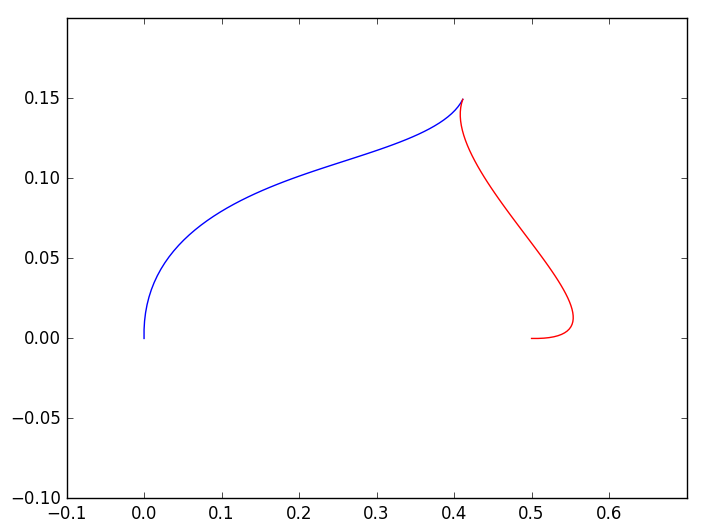

optimal rendezvous location[0.411276,0.149441]

In [58]:
va_c = getvalue(VA)
xa = getvalue(XA)
xb = getvalue(XB)
plot(xa[:,1], xa[:,2], color="blue")
plot(xb[:,1], xb[:,2], color="red")
xlim(-0.1,0.7)
ylim(-0.1,0.2)
print("optimal rendezvous location", xa[60,:])

As you can see both Alice and Bob's max velocities never go above 35

In [60]:
va_c = getvalue(VA)
vb_c = getvalue(VB)
max = -1
for i in 1:60
    if norm(va_c[i,:]) > max
        max = norm(va_c[i,:])
    end
end
println(max)

max = -1
for i in 1:60
    if norm(vb_c[i,:]) > max
        max = norm(vb_c[i,:])
    end
end
println(max)


34.99999637821745
30.0
